In [61]:
from __future__ import print_function, division
from builtins import range
import os
import numpy as np
from sklearn.utils import shuffle
import matplotlib.pyplot as plt
import pandas as pd

In [62]:
def forward(X, W1, b1, W2, b2):
    # sigmoid
    Z = 1 / (1 + np.exp(-( X.dot(W1) + b1 )))

    # relu
    #Z = X.dot(W1) + b1
    #Z[Z < 0] = 0

    A = Z.dot(W2) + b2
    expA = np.exp(A)
    Y = expA / expA.sum(axis=1, keepdims=True)
    return Y, Z

def derivative_w2(Z, T, Y):
    return Z.T.dot(Y - T)

def derivative_b2(T, Y):
    return (Y - T).sum(axis=0)

def derivative_w1(X, Z, T, Y, W2):
    return X.T.dot( ( ( Y-T ).dot(W2.T) * ( Z*(1 - Z) ) ) ) # for sigmoid
    #return X.T.dot( ( ( Y-T ).dot(W2.T) * (Z > 0) ) ) # for relu

def derivative_b1(Z, T, Y, W2):
    return (( Y-T ).dot(W2.T) * ( Z*(1 - Z) )).sum(axis=0) # for sigmoid
    #return (( Y-T ).dot(W2.T) * (Z > 0)).sum(axis=0) # for relu

In [63]:
def get_normalized_data():
    print("Reading in and transforming data...")

    if not os.path.exists('Mnist/train.csv'):
        print('Looking for Mnist/train.csv')
        print('You have not downloaded the data and/or not placed the files in the correct location.')
        print('Please get the data from: https://www.kaggle.com/c/digit-recognizer')
        print('Place train.csv in the folder Mnist folder adjacent to the class folder')
        exit()

    df = pd.read_csv('Mnist/train.csv')
    data = df.values.astype(np.float32)
    np.random.shuffle(data)
    X = data[:, 1:]
    Y = data[:, 0]

    Xtrain = X[:-1000]
    Ytrain = Y[:-1000]
    Xtest  = X[-1000:]
    Ytest  = Y[-1000:]

    # normalize the data
    mu = Xtrain.mean(axis=0)
    std = Xtrain.std(axis=0)
    np.place(std, std == 0, 1)
    Xtrain = (Xtrain - mu) / std
    Xtest = (Xtest - mu) / std
    
    return Xtrain, Xtest, Ytrain, Ytest

In [64]:
def predict(p_y):
    return np.argmax(p_y, axis=1)

def error_rate(p_y, t):
    prediction = predict(p_y)
    return np.mean(prediction != t)


def cost(p_y, t):
    tot = t * np.log(p_y)
    return -tot.sum()

def y2indicator(y):
    N = len(y)
    y = y.astype(np.int32)
    ind = np.zeros((N, 10))
    for i in range(N):
        ind[i, y[i]] = 1
    return ind

In [65]:
Xtrain, Xtest, Ytrain, Ytest = get_normalized_data()
lr = 0.00004
reg = 0.01

Reading in and transforming data...


In [66]:
Ytrain_ind = y2indicator(Ytrain)
Ytest_ind = y2indicator(Ytest)
N, D =Xtrain.shape
batchSize = 500
n_batches = N // batchSize
M = 300
K = 10
W1 = np.random.randn(D, M) / 28
b1 = np.zeros(M)
W2 = np.random.randn(M, K) / np.sqrt(M)
b2 = np.zeros(K)

#Shallow copy of the initial weights
W1_0 = W1.copy()
b1_0 = b1.copy()
W2_0 = W2.copy()
b2_0 = b2.copy()

In [67]:
# Regular Batch Gradient Descent
W1 = W1_0.copy()
b1 = b1_0.copy()
W2 = W2_0.copy()
b2 = b2_0.copy()

losses_batch = []
errors_batch = []
max_Iterations = 30
for i in range (max_Iterations):
    for j in range (n_batches):
        Xbatch = Xtrain[j*batchSize:(j*batchSize + batchSize),]
        Ybatch =Ytrain_ind[j*batchSize:(j*batchSize + batchSize),]
        pYbatch, Z = forward(Xbatch, W1, b1, W2, b2)
        
        W2 -= lr*(derivative_w2(Z, Ybatch, pYbatch) + reg*W2)
        b2 -= lr*(derivative_b2(Ybatch, pYbatch) + reg*b2)
        W1 -= lr*(derivative_w1(Xbatch,Z, Ybatch, pYbatch, W2) + reg*W1)
        b1 -= lr*(derivative_b1(Z, Ybatch, pYbatch, W2) + reg*b1)
        
        if j % 10 == 0:
            pY, _ = forward(Xtest, W1, b1, W2, b2)
            l = cost(pY, Ytest_ind)
            losses_batch.append(l)
            print("Cost at iteration i=%d, j=%d: %.6f" % (i, j, l))

            e = error_rate(pY, Ytest)
            errors_batch.append(e)
            print("Error rate:", e)
            
pY, _ = forward(Xtest, W1, b1, W2, b2)
print("Final error rate:", error_rate(pY, Ytest))


Cost at iteration i=0, j=0: 2378.512082
Error rate: 0.88
Cost at iteration i=0, j=10: 2189.626795
Error rate: 0.728
Cost at iteration i=0, j=20: 2090.475843
Error rate: 0.577
Cost at iteration i=0, j=30: 1998.549314
Error rate: 0.492
Cost at iteration i=0, j=40: 1913.685101
Error rate: 0.425
Cost at iteration i=0, j=50: 1832.787299
Error rate: 0.392
Cost at iteration i=0, j=60: 1758.252421
Error rate: 0.347
Cost at iteration i=0, j=70: 1688.074795
Error rate: 0.327
Cost at iteration i=0, j=80: 1619.627891
Error rate: 0.295
Cost at iteration i=1, j=0: 1606.856630
Error rate: 0.283
Cost at iteration i=1, j=10: 1546.500192
Error rate: 0.279
Cost at iteration i=1, j=20: 1487.896517
Error rate: 0.253
Cost at iteration i=1, j=30: 1432.991844
Error rate: 0.248
Cost at iteration i=1, j=40: 1382.054015
Error rate: 0.238
Cost at iteration i=1, j=50: 1334.569992
Error rate: 0.224
Cost at iteration i=1, j=60: 1290.246136
Error rate: 0.214
Cost at iteration i=1, j=70: 1248.641510
Error rate: 0.213


Cost at iteration i=15, j=60: 408.115498
Error rate: 0.116
Cost at iteration i=15, j=70: 406.357611
Error rate: 0.113
Cost at iteration i=15, j=80: 404.788132
Error rate: 0.112
Cost at iteration i=16, j=0: 404.292693
Error rate: 0.112
Cost at iteration i=16, j=10: 403.910103
Error rate: 0.114
Cost at iteration i=16, j=20: 403.042687
Error rate: 0.116
Cost at iteration i=16, j=30: 401.733880
Error rate: 0.117
Cost at iteration i=16, j=40: 400.571948
Error rate: 0.115
Cost at iteration i=16, j=50: 399.742511
Error rate: 0.116
Cost at iteration i=16, j=60: 398.345181
Error rate: 0.116
Cost at iteration i=16, j=70: 396.722179
Error rate: 0.114
Cost at iteration i=16, j=80: 395.278223
Error rate: 0.111
Cost at iteration i=17, j=0: 394.806776
Error rate: 0.111
Cost at iteration i=17, j=10: 394.523963
Error rate: 0.114
Cost at iteration i=17, j=20: 393.783560
Error rate: 0.115
Cost at iteration i=17, j=30: 392.602254
Error rate: 0.117
Cost at iteration i=17, j=40: 391.559842
Error rate: 0.114

In [68]:
#Batch Gradient Descent with momentum
W1 = W1_0.copy()
b1 = b1_0.copy()
W2 = W2_0.copy()
b2 = b2_0.copy()
max_Iterations = 30
losses_momentum = []
errors_momentum = []
mu = 0.9
dW2 = 0
db2 = 0
dW1 = 0
db1 = 0
for i in range(max_Iterations):
    for j in range(n_batches):
        Xbatch = Xtrain[j*batchSize:(j*batchSize + batchSize),]
        Ybatch = Ytrain_ind[j*batchSize:(j*batchSize + batchSize),]
        pYbatch, Z = forward(Xbatch, W1, b1, W2, b2)

        # gradients
        gW2 = derivative_w2(Z, Ybatch, pYbatch) + reg*W2
        gb2 = derivative_b2(Ybatch, pYbatch) + reg*b2
        gW1 = derivative_w1(Xbatch, Z, Ybatch, pYbatch, W2) + reg*W1
        gb1 = derivative_b1(Z, Ybatch, pYbatch, W2) + reg*b1

        # update velocities
        dW2 = mu*dW2 - lr*gW2
        db2 = mu*db2 - lr*gb2
        dW1 = mu*dW1 - lr*gW1
        db1 = mu*db1 - lr*gb1

        # updates
        W2 += dW2
        b2 += db2
        W1 += dW1
        b1 += db1

        if j % 10 == 0:
            pY, _ = forward(Xtest, W1, b1, W2, b2)
            l = cost(pY, Ytest_ind)
            losses_momentum.append(l)
            print("Cost at iteration i=%d, j=%d: %.6f" % (i, j, l))

            e = error_rate(pY, Ytest)
            errors_momentum.append(e)
            print("Error rate:", e)
pY, _ = forward(Xtest, W1, b1, W2, b2)
print("Final error rate:", error_rate(pY, Ytest))


Cost at iteration i=0, j=0: 2378.509487
Error rate: 0.88
Cost at iteration i=0, j=10: 1865.425178
Error rate: 0.498
Cost at iteration i=0, j=20: 1325.054801
Error rate: 0.293
Cost at iteration i=0, j=30: 977.605668
Error rate: 0.197
Cost at iteration i=0, j=40: 782.641434
Error rate: 0.181
Cost at iteration i=0, j=50: 668.066462
Error rate: 0.158
Cost at iteration i=0, j=60: 595.580369
Error rate: 0.15
Cost at iteration i=0, j=70: 544.658562
Error rate: 0.14
Cost at iteration i=0, j=80: 508.545374
Error rate: 0.138
Cost at iteration i=1, j=0: 502.650494
Error rate: 0.135
Cost at iteration i=1, j=10: 478.362816
Error rate: 0.125
Cost at iteration i=1, j=20: 456.087886
Error rate: 0.129
Cost at iteration i=1, j=30: 436.764259
Error rate: 0.122
Cost at iteration i=1, j=40: 421.980410
Error rate: 0.119
Cost at iteration i=1, j=50: 406.696176
Error rate: 0.122
Cost at iteration i=1, j=60: 396.919374
Error rate: 0.118
Cost at iteration i=1, j=70: 386.073166
Error rate: 0.112
Cost at iteratio

Cost at iteration i=15, j=60: 224.028864
Error rate: 0.062
Cost at iteration i=15, j=70: 222.901406
Error rate: 0.063
Cost at iteration i=15, j=80: 222.849424
Error rate: 0.065
Cost at iteration i=16, j=0: 222.942142
Error rate: 0.065
Cost at iteration i=16, j=10: 223.576629
Error rate: 0.066
Cost at iteration i=16, j=20: 223.376581
Error rate: 0.063
Cost at iteration i=16, j=30: 223.366217
Error rate: 0.062
Cost at iteration i=16, j=40: 221.880485
Error rate: 0.063
Cost at iteration i=16, j=50: 223.718134
Error rate: 0.064
Cost at iteration i=16, j=60: 221.198320
Error rate: 0.061
Cost at iteration i=16, j=70: 220.011542
Error rate: 0.063
Cost at iteration i=16, j=80: 219.903257
Error rate: 0.065
Cost at iteration i=17, j=0: 220.001799
Error rate: 0.064
Cost at iteration i=17, j=10: 220.685886
Error rate: 0.065
Cost at iteration i=17, j=20: 220.490423
Error rate: 0.062
Cost at iteration i=17, j=30: 220.550392
Error rate: 0.061
Cost at iteration i=17, j=40: 219.027743
Error rate: 0.063

In [69]:
#batch Gradient Descent with Nesterov momentum
W1 = W1_0.copy()
b1 = b1_0.copy()
W2 = W2_0.copy()
b2 = b2_0.copy()

max_Iterations = 30
losses_nesterov = []
errors_nesterov = []

mu = 0.9
vW2 = 0
vb2 = 0
vW1 = 0
vb1 = 0
for i in range(max_Iterations):
    for j in range(batchSize):
        Xbatch = Xtrain[j*batchSize:(j*batchSize + batchSize),]
        Ybatch = Ytrain_ind[j*batchSize:(j*batchSize + batchSize),]
        pYbatch, Z = forward(Xbatch, W1, b1, W2, b2)

        # updates
        gW2 = derivative_w2(Z, Ybatch, pYbatch) + reg*W2
        gb2 = derivative_b2(Ybatch, pYbatch) + reg*b2
        gW1 = derivative_w1(Xbatch, Z, Ybatch, pYbatch, W2) + reg*W1
        gb1 = derivative_b1(Z, Ybatch, pYbatch, W2) + reg*b1

        # v update
        vW2 = mu*vW2 - lr*gW2
        vb2 = mu*vb2 - lr*gb2
        vW1 = mu*vW1 - lr*gW1
        vb1 = mu*vb1 - lr*gb1

        # param update
        W2 += mu*vW2 - lr*gW2
        b2 += mu*vb2 - lr*gb2
        W1 += mu*vW1 - lr*gW1
        b1 += mu*vb1 - lr*gb1

        if j % 10 == 0:
            pY, _ = forward(Xtest, W1, b1, W2, b2)
            l = cost(pY, Ytest_ind)
            losses_nesterov.append(l)
            print("Cost at iteration i=%d, j=%d: %.6f" % (i, j, l))

            e = error_rate(pY, Ytest)
            errors_nesterov.append(e)
            print("Error rate:", e)
pY, _ = forward(Xtest, W1, b1, W2, b2)
print("Final error rate:", error_rate(pY, Ytest))

Cost at iteration i=0, j=0: 2345.958455
Error rate: 0.877
Cost at iteration i=0, j=10: 1805.441333
Error rate: 0.391
Cost at iteration i=0, j=20: 1287.155404
Error rate: 0.247
Cost at iteration i=0, j=30: 958.101216
Error rate: 0.201
Cost at iteration i=0, j=40: 772.866374
Error rate: 0.173
Cost at iteration i=0, j=50: 663.499285
Error rate: 0.155
Cost at iteration i=0, j=60: 593.663200
Error rate: 0.147
Cost at iteration i=0, j=70: 542.602616
Error rate: 0.14
Cost at iteration i=0, j=80: 507.521382
Error rate: 0.135
Cost at iteration i=0, j=90: 490.010517
Error rate: 0.133
Cost at iteration i=0, j=100: 484.890131
Error rate: 0.131
Cost at iteration i=0, j=110: 483.204730
Error rate: 0.132
Cost at iteration i=0, j=120: 482.641399
Error rate: 0.133
Cost at iteration i=0, j=130: 482.460277
Error rate: 0.133
Cost at iteration i=0, j=140: 482.411345
Error rate: 0.133
Cost at iteration i=0, j=150: 482.408381
Error rate: 0.133
Cost at iteration i=0, j=160: 482.421435
Error rate: 0.133
Cost a

Cost at iteration i=2, j=400: 326.467163
Error rate: 0.103
Cost at iteration i=2, j=410: 326.477491
Error rate: 0.103
Cost at iteration i=2, j=420: 326.487821
Error rate: 0.103
Cost at iteration i=2, j=430: 326.498155
Error rate: 0.103
Cost at iteration i=2, j=440: 326.508492
Error rate: 0.103
Cost at iteration i=2, j=450: 326.518832
Error rate: 0.103
Cost at iteration i=2, j=460: 326.529175
Error rate: 0.103
Cost at iteration i=2, j=470: 326.539521
Error rate: 0.103
Cost at iteration i=2, j=480: 326.549871
Error rate: 0.103
Cost at iteration i=2, j=490: 326.560223
Error rate: 0.103
Cost at iteration i=3, j=0: 325.776937
Error rate: 0.102
Cost at iteration i=3, j=10: 325.256450
Error rate: 0.101
Cost at iteration i=3, j=20: 321.874248
Error rate: 0.103
Cost at iteration i=3, j=30: 316.875195
Error rate: 0.101
Cost at iteration i=3, j=40: 314.646199
Error rate: 0.099
Cost at iteration i=3, j=50: 311.540462
Error rate: 0.101
Cost at iteration i=3, j=60: 307.267336
Error rate: 0.094
Cost 

Cost at iteration i=5, j=310: 273.344064
Error rate: 0.084
Cost at iteration i=5, j=320: 273.350869
Error rate: 0.084
Cost at iteration i=5, j=330: 273.357678
Error rate: 0.084
Cost at iteration i=5, j=340: 273.364489
Error rate: 0.084
Cost at iteration i=5, j=350: 273.371302
Error rate: 0.084
Cost at iteration i=5, j=360: 273.378119
Error rate: 0.084
Cost at iteration i=5, j=370: 273.384937
Error rate: 0.084
Cost at iteration i=5, j=380: 273.391759
Error rate: 0.084
Cost at iteration i=5, j=390: 273.398583
Error rate: 0.084
Cost at iteration i=5, j=400: 273.405410
Error rate: 0.084
Cost at iteration i=5, j=410: 273.412239
Error rate: 0.084
Cost at iteration i=5, j=420: 273.419071
Error rate: 0.084
Cost at iteration i=5, j=430: 273.425906
Error rate: 0.084
Cost at iteration i=5, j=440: 273.432744
Error rate: 0.084
Cost at iteration i=5, j=450: 273.439584
Error rate: 0.084
Cost at iteration i=5, j=460: 273.446426
Error rate: 0.084
Cost at iteration i=5, j=470: 273.453272
Error rate: 0.0

Cost at iteration i=8, j=210: 251.627104
Error rate: 0.078
Cost at iteration i=8, j=220: 251.632560
Error rate: 0.078
Cost at iteration i=8, j=230: 251.638017
Error rate: 0.078
Cost at iteration i=8, j=240: 251.643476
Error rate: 0.078
Cost at iteration i=8, j=250: 251.648937
Error rate: 0.078
Cost at iteration i=8, j=260: 251.654401
Error rate: 0.078
Cost at iteration i=8, j=270: 251.659867
Error rate: 0.078
Cost at iteration i=8, j=280: 251.665336
Error rate: 0.078
Cost at iteration i=8, j=290: 251.670807
Error rate: 0.078
Cost at iteration i=8, j=300: 251.676280
Error rate: 0.078
Cost at iteration i=8, j=310: 251.681756
Error rate: 0.078
Cost at iteration i=8, j=320: 251.687234
Error rate: 0.078
Cost at iteration i=8, j=330: 251.692714
Error rate: 0.078
Cost at iteration i=8, j=340: 251.698197
Error rate: 0.078
Cost at iteration i=8, j=350: 251.703682
Error rate: 0.078
Cost at iteration i=8, j=360: 251.709170
Error rate: 0.078
Cost at iteration i=8, j=370: 251.714660
Error rate: 0.0

Cost at iteration i=11, j=90: 237.463363
Error rate: 0.066
Cost at iteration i=11, j=100: 237.936453
Error rate: 0.069
Cost at iteration i=11, j=110: 238.136667
Error rate: 0.069
Cost at iteration i=11, j=120: 238.213459
Error rate: 0.069
Cost at iteration i=11, j=130: 238.243776
Error rate: 0.069
Cost at iteration i=11, j=140: 238.257470
Error rate: 0.069
Cost at iteration i=11, j=150: 238.265319
Error rate: 0.069
Cost at iteration i=11, j=160: 238.271125
Error rate: 0.069
Cost at iteration i=11, j=170: 238.276219
Error rate: 0.069
Cost at iteration i=11, j=180: 238.281067
Error rate: 0.069
Cost at iteration i=11, j=190: 238.285830
Error rate: 0.069
Cost at iteration i=11, j=200: 238.290565
Error rate: 0.069
Cost at iteration i=11, j=210: 238.295291
Error rate: 0.069
Cost at iteration i=11, j=220: 238.300016
Error rate: 0.069
Cost at iteration i=11, j=230: 238.304742
Error rate: 0.069
Cost at iteration i=11, j=240: 238.309470
Error rate: 0.069
Cost at iteration i=11, j=250: 238.314200

Cost at iteration i=13, j=470: 231.400266
Error rate: 0.066
Cost at iteration i=13, j=480: 231.404711
Error rate: 0.066
Cost at iteration i=13, j=490: 231.409159
Error rate: 0.066
Cost at iteration i=14, j=0: 230.944419
Error rate: 0.066
Cost at iteration i=14, j=10: 230.604149
Error rate: 0.066
Cost at iteration i=14, j=20: 230.569682
Error rate: 0.065
Cost at iteration i=14, j=30: 229.447706
Error rate: 0.065
Cost at iteration i=14, j=40: 228.828981
Error rate: 0.067
Cost at iteration i=14, j=50: 230.231119
Error rate: 0.067
Cost at iteration i=14, j=60: 227.584421
Error rate: 0.064
Cost at iteration i=14, j=70: 226.886440
Error rate: 0.064
Cost at iteration i=14, j=80: 226.779871
Error rate: 0.065
Cost at iteration i=14, j=90: 227.249017
Error rate: 0.064
Cost at iteration i=14, j=100: 227.738534
Error rate: 0.065
Cost at iteration i=14, j=110: 227.943321
Error rate: 0.064
Cost at iteration i=14, j=120: 228.021302
Error rate: 0.065
Cost at iteration i=14, j=130: 228.051714
Error rat

Cost at iteration i=16, j=350: 222.221937
Error rate: 0.062
Cost at iteration i=16, j=360: 222.225980
Error rate: 0.062
Cost at iteration i=16, j=370: 222.230026
Error rate: 0.062
Cost at iteration i=16, j=380: 222.234074
Error rate: 0.062
Cost at iteration i=16, j=390: 222.238124
Error rate: 0.062
Cost at iteration i=16, j=400: 222.242176
Error rate: 0.062
Cost at iteration i=16, j=410: 222.246230
Error rate: 0.062
Cost at iteration i=16, j=420: 222.250286
Error rate: 0.062
Cost at iteration i=16, j=430: 222.254344
Error rate: 0.062
Cost at iteration i=16, j=440: 222.258404
Error rate: 0.062
Cost at iteration i=16, j=450: 222.262466
Error rate: 0.062
Cost at iteration i=16, j=460: 222.266531
Error rate: 0.062
Cost at iteration i=16, j=470: 222.270597
Error rate: 0.062
Cost at iteration i=16, j=480: 222.274665
Error rate: 0.062
Cost at iteration i=16, j=490: 222.278736
Error rate: 0.062
Cost at iteration i=17, j=0: 221.862570
Error rate: 0.062
Cost at iteration i=17, j=10: 221.523805
E

Cost at iteration i=19, j=240: 214.050079
Error rate: 0.06
Cost at iteration i=19, j=250: 214.053816
Error rate: 0.06
Cost at iteration i=19, j=260: 214.057554
Error rate: 0.06
Cost at iteration i=19, j=270: 214.061294
Error rate: 0.06
Cost at iteration i=19, j=280: 214.065036
Error rate: 0.06
Cost at iteration i=19, j=290: 214.068781
Error rate: 0.06
Cost at iteration i=19, j=300: 214.072527
Error rate: 0.06
Cost at iteration i=19, j=310: 214.076275
Error rate: 0.06
Cost at iteration i=19, j=320: 214.080025
Error rate: 0.06
Cost at iteration i=19, j=330: 214.083777
Error rate: 0.06
Cost at iteration i=19, j=340: 214.087532
Error rate: 0.06
Cost at iteration i=19, j=350: 214.091288
Error rate: 0.06
Cost at iteration i=19, j=360: 214.095046
Error rate: 0.06
Cost at iteration i=19, j=370: 214.098806
Error rate: 0.06
Cost at iteration i=19, j=380: 214.102568
Error rate: 0.06
Cost at iteration i=19, j=390: 214.106332
Error rate: 0.06
Cost at iteration i=19, j=400: 214.110098
Error rate: 0.

Cost at iteration i=22, j=130: 206.551125
Error rate: 0.057
Cost at iteration i=22, j=140: 206.563310
Error rate: 0.057
Cost at iteration i=22, j=150: 206.569833
Error rate: 0.057
Cost at iteration i=22, j=160: 206.574377
Error rate: 0.057
Cost at iteration i=22, j=170: 206.578232
Error rate: 0.057
Cost at iteration i=22, j=180: 206.581847
Error rate: 0.057
Cost at iteration i=22, j=190: 206.585381
Error rate: 0.057
Cost at iteration i=22, j=200: 206.588886
Error rate: 0.057
Cost at iteration i=22, j=210: 206.592384
Error rate: 0.057
Cost at iteration i=22, j=220: 206.595880
Error rate: 0.057
Cost at iteration i=22, j=230: 206.599376
Error rate: 0.057
Cost at iteration i=22, j=240: 206.602874
Error rate: 0.057
Cost at iteration i=22, j=250: 206.606374
Error rate: 0.057
Cost at iteration i=22, j=260: 206.609875
Error rate: 0.057
Cost at iteration i=22, j=270: 206.613379
Error rate: 0.057
Cost at iteration i=22, j=280: 206.616884
Error rate: 0.057
Cost at iteration i=22, j=290: 206.62039

Cost at iteration i=25, j=0: 201.731723
Error rate: 0.056
Cost at iteration i=25, j=10: 201.529138
Error rate: 0.053
Cost at iteration i=25, j=20: 201.617853
Error rate: 0.053
Cost at iteration i=25, j=30: 201.304613
Error rate: 0.054
Cost at iteration i=25, j=40: 200.268616
Error rate: 0.055
Cost at iteration i=25, j=50: 201.664880
Error rate: 0.054
Cost at iteration i=25, j=60: 200.086283
Error rate: 0.053
Cost at iteration i=25, j=70: 198.935110
Error rate: 0.053
Cost at iteration i=25, j=80: 198.463609
Error rate: 0.054
Cost at iteration i=25, j=90: 198.938111
Error rate: 0.054
Cost at iteration i=25, j=100: 199.381966
Error rate: 0.056
Cost at iteration i=25, j=110: 199.567477
Error rate: 0.056
Cost at iteration i=25, j=120: 199.637788
Error rate: 0.056
Cost at iteration i=25, j=130: 199.664860
Error rate: 0.056
Cost at iteration i=25, j=140: 199.676481
Error rate: 0.056
Cost at iteration i=25, j=150: 199.682670
Error rate: 0.056
Cost at iteration i=25, j=160: 199.686961
Error rat

Cost at iteration i=27, j=390: 195.443716
Error rate: 0.053
Cost at iteration i=27, j=400: 195.446901
Error rate: 0.053
Cost at iteration i=27, j=410: 195.450089
Error rate: 0.053
Cost at iteration i=27, j=420: 195.453277
Error rate: 0.053
Cost at iteration i=27, j=430: 195.456468
Error rate: 0.053
Cost at iteration i=27, j=440: 195.459661
Error rate: 0.053
Cost at iteration i=27, j=450: 195.462855
Error rate: 0.053
Cost at iteration i=27, j=460: 195.466051
Error rate: 0.053
Cost at iteration i=27, j=470: 195.469249
Error rate: 0.053
Cost at iteration i=27, j=480: 195.472449
Error rate: 0.053
Cost at iteration i=27, j=490: 195.475651
Error rate: 0.053
Cost at iteration i=28, j=0: 195.205076
Error rate: 0.053
Cost at iteration i=28, j=10: 195.072879
Error rate: 0.049
Cost at iteration i=28, j=20: 195.163769
Error rate: 0.051
Cost at iteration i=28, j=30: 195.036623
Error rate: 0.051
Cost at iteration i=28, j=40: 193.949016
Error rate: 0.053
Cost at iteration i=28, j=50: 195.262452
Error

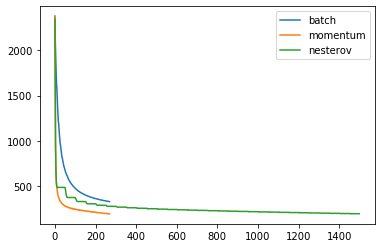

In [71]:
#Plotting the results
plt.plot(losses_batch, label="batch")
plt.plot(losses_momentum, label="momentum")
plt.plot(losses_nesterov, label="nesterov")
plt.legend()
plt.show()

In [72]:
print (batchSize)

500
